## Test a random forest model on full dataset

In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.

import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)

import process
from modeling import categorize


Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load in dataset

In [2]:
test_data,val_data = process.get_split_add_data(frac=.4) #,random_state=20)
val_data

,urban,rural,institutionalized_all,institutionalized_adult_all,institutionalized_adult_federal_detention_all,institutionalized_adult_federal_prison_all,institutionalized_adult_state_prison_all,institutionalized_adult_local_jail_all,institutionalized_juvenile_all,institutionalized_white,institutionalized_adult_white,institutionalized_adult_federal_detention_white,institutionalized_adult_federal_prison_white,institutionalized_adult_state_prison_white,institutionalized_adult_local_jail_white,institutionalized_juvenile_white,institutionalized_black,institutionalized_adult_black,institutionalized_adult_federal_detention_black,institutionalized_adult_federal_prison_black,institutionalized_adult_state_prison_black,institutionalized_adult_local_jail_black,institutionalized_juvenile_black,population_white,population_black,total_income_estimate_all,total_income_estimate_white,total_income_estimate_black,swnauthemp,swnftemp,...,numothunm_per_capita,numplanes_per_capita,numcopters_per_capita,numboats_per_capita,nummotor_per_capita,numcarcam_per_capita,numfixcam_per_capita,nummobcam_per_capita,diversity_index,white_per_totofficers,black_per_totofficers,hispanic_per_totofficers,asian_per_totofficers,nathaw_per_totofficers,amerind_per_totofficers,multrace_per_totofficers,unkrace_per_totofficers,rpsi,black_over_white_population_disparity,black_over_white_income_disparity,black_over_white_institutionalized_disparity,black_over_white_institutionalized_adult_disparity,black_over_white_institutionalized_adult_federal_detention_disparity,black_over_white_institutionalized_adult_federal_prison_disparity,black_over_white_institutionalized_adult_state_prison_disparity,black_over_white_institutionalized_adult_local_jail_disparity,black_over_white_institutionalized_juvenile_disparity,black_officer_disparity,white_officer_disparity,black_over_white_officer_disparity
surveyid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1222,26616,31,186,0,0,0,0,0,13,144,0,0,0,0,0,5,37,0,0,0,0,0,6,24649,323,9712,9063,35,65,65,...,0.000150,0,0.000000,0.000075,0.000038,0.000075,0.000525,0.000000,0.089423,0.953846,0.000000,0.046154,0.000000,0,0.000000,0.000000,0,3.067020,0.013104,0.003862,0.256944,1.000000,1,1.000000,1.000000,1.000000,1.200000,0.000000,1.031163,0.000000
184,110372,0,1149,219,0,0,0,0,44,861,83,0,0,0,0,23,209,82,0,0,0,0,13,64836,22146,40950,26944,7822,300,300,...,0.000136,0,0.000000,0.000000,0.000082,0.000000,0.000027,0.000027,0.339331,0.800000,0.070000,0.130000,0.000000,0,0.000000,0.000000,0,1.356672,0.341569,0.290306,0.242741,0.987952,1,1.000000,1.000000,1.000000,0.565217,0.348868,1.361861,0.256170
175,123919,0,2194,1277,0,0,0,1095,119,1027,378,0,0,0,309,46,683,512,0,0,0,436,46,36606,48114,46061,17050,17580,592,417,...,0.000169,0,0.000000,0.000024,0.000105,0.000347,0.000016,0.000000,0.545690,0.625899,0.151079,0.201439,0.021583,0,0.000000,0.000000,0,1.708121,1.314375,1.031085,0.665044,1.354497,1,1.000000,1.000000,1.411003,1.000000,0.389109,2.118801,0.183646
170,78229,2653,1904,1341,0,1339,0,0,25,1162,637,0,637,0,0,17,434,406,0,406,0,0,7,55191,5803,29034,21017,1763,152,148,...,0.000074,0,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.199577,0.891892,0.027027,0.074324,0.006757,0,0.000000,0.000000,0,1.210668,0.105144,0.083884,0.373494,0.637363,1,0.637363,1.000000,1.000000,0.411765,0.376702,1.307061,0.288205
174,59531,1435,427,0,0,0,0,0,82,363,0,0,0,0,0,43,53,0,0,0,0,0,28,41750,12292,23342,16691,4492,107,101,...,0.000066,0,0.000000,0.000000,0.000066,0.000197,0.000000,0.000016,0.133465,0.930693,0.029703,0.019802,0.019802,0,0.000000,0.000000,0,2.385800,0.294419,0.269127,0.146006,1.000000,1,1.000000,1.000000,1.000000,0.651163,0.147321,1.359057,0.108400
179,73240,0,790,0,0,0,0,0,59,673,0,0,0,0,0,34,59,0,0,0,0,0,14,46607,9530,27832,19961,2811,160,172,...,0.000096,0,0.000000,0.000000,0.000055,0.000000,0.000000,0.000000,0.203794,0.889535,0.058140,0.052326,0.000000,0,0.000000,0.000000,0,1.547964,0.204476,0.140825,0.087667,1.000000,1,1.000000,1.0

In [ ]:
val_data.to_sql('val_data',process.engine,if_exists='replace')



In [16]:
len(val_data)+len(test_data)

182

# Build Model

In [20]:
processor = process.Processor(val_data,categorize=False)
X_val,y_val = processor.get_scaled_Xy(val_data)
X_test,y_test = processor.get_scaled_Xy(test_data)


In [ ]:
len(val_data)

In [ ]:
val_data

In [4]:
val_data_scaled = pd.DataFrame(np.c_[X_val,y_val],index=val_data.index,columns=val_data.drop('rpsi',1).columns.tolist()+['rpsi'])
val_data_scaled = val_data_scaled.fillna(0)
val_data_scaled.to_sql('val_data_scaled',process.engine,if_exists='replace')#print X_val+y_val

In [5]:
val_data_scaled

,urban,rural,institutionalized_all,institutionalized_adult_all,institutionalized_adult_federal_detention_all,institutionalized_adult_federal_prison_all,institutionalized_adult_state_prison_all,institutionalized_adult_local_jail_all,institutionalized_juvenile_all,institutionalized_white,institutionalized_adult_white,institutionalized_adult_federal_detention_white,institutionalized_adult_federal_prison_white,institutionalized_adult_state_prison_white,institutionalized_adult_local_jail_white,institutionalized_juvenile_white,institutionalized_black,institutionalized_adult_black,institutionalized_adult_federal_detention_black,institutionalized_adult_federal_prison_black,institutionalized_adult_state_prison_black,institutionalized_adult_local_jail_black,institutionalized_juvenile_black,population_white,population_black,total_income_estimate_all,total_income_estimate_white,total_income_estimate_black,swnauthemp,swnftemp,...,numothunm_per_capita,numplanes_per_capita,numcopters_per_capita,numboats_per_capita,nummotor_per_capita,numcarcam_per_capita,numfixcam_per_capita,nummobcam_per_capita,diversity_index,white_per_totofficers,black_per_totofficers,hispanic_per_totofficers,asian_per_totofficers,nathaw_per_totofficers,amerind_per_totofficers,multrace_per_totofficers,unkrace_per_totofficers,black_over_white_population_disparity,black_over_white_income_disparity,black_over_white_institutionalized_disparity,black_over_white_institutionalized_adult_disparity,black_over_white_institutionalized_adult_federal_detention_disparity,black_over_white_institutionalized_adult_federal_prison_disparity,black_over_white_institutionalized_adult_state_prison_disparity,black_over_white_institutionalized_adult_local_jail_disparity,black_over_white_institutionalized_juvenile_disparity,black_officer_disparity,white_officer_disparity,black_over_white_officer_disparity,rpsi
surveyid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1222,-0.286635,-0.705179,-0.389699,-0.423480,-0.096658,-0.094491,-0.376233,-0.276140,-0.358165,-0.521624,-0.503671,-0.095748,-0.094491,-0.384899,-0.360822,-0.469532,-0.290048,-0.364677,-0.098408,-0.094491,-0.369196,-0.231251,-0.293275,-0.359656,-0.298751,-0.332620,-0.361641,-0.306852,-0.143267,-0.138893,...,1.157275,-0.120454,-0.131347,3.846122,0.441350,-0.722845,3.743373,-0.343149,-0.791770,0.709164,-0.802760,0.228491,-0.433591,-0.240918,-0.287483,-0.201935,-0.112706,-0.773802,-0.790609,-0.526288,-0.306501,-0.10001,0.094491,-0.116888,-0.221133,0.050126,-0.515756,-0.905041,-0.459698,3.067020
184,0.026446,-0.707191,-0.039410,-0.256826,-0.096658,-0.094491,-0.376233,-0.276140,-0.023591,0.165772,-0.286947,-0.095748,-0.094491,-0.384899,-0.360822,0.101657,-0.184629,-0.272866,-0.098408,-0.094491,-0.369196,-0.231251,-0.174797,-0.046328,-0.051872,-0.029796,-0.047340,-0.067320,0.040977,0.049190,...,0.939113,-0.120454,-0.131347,-0.480217,1.814480,-0.987738,-0.142155,1.658709,0.795554,-0.544709,-0.101877,2.008306,-0.433591,-0.240918,-0.287483,-0.201935,-0.112706,0.143518,0.115048,-0.553002,-0.321249,-0.10001,0.094491,-0.116888,-0.221133,-0.484354,-0.242717,0.451797,-0.261279,1.356672
175,0.077085,-0.707191,0.340706,0.548287,-0.096658,-0.094491,-0.376233,0.906026,0.785862,0.324918,0.483336,-0.095748,-0.094491,-0.384899,0.874963,0.831510,0.105885,0.208581,-0.098408,-0.094491,-0.369196,0.414626,0.383744,-0.266430,0.241900,0.019751,-0.221251,0.232841,0.269910,0.142831,...,1.454493,-0.120454,-0.131347,0.915258,2.543393,0.236929,-0.228266,-0.343149,2.106273,-1.963660,0.709938,3.524750,1.730291,-0.240918,-0.287483,-0.201935,-0.112706,2.860314,2.457188,0.241278,0.127422,-0.10001,0.094491,-0.116888,0.302753,-0.118272,-0.211223,3.557488,-0.317454,1.708121
170,-0.093705,-0.535017,0.235219,0.596989,-0.096658,10.583005,-0.376233,-0.276140,-0.228653,0.454344,1.159619,-0.095748,10.583005,-0.384899,-0.360822,-0.088739,-0.046727,0.089898,-0.098408,10.583005,-0.369196,-0.231251,-0.276349,-0.121528,-0.236757,-0.145311,-0.151521,-0.253698,-0.075058,-0.07

In [ ]:
plt.hist(val_data['rpsi'].tolist(),bins=40)

In [ ]:
val_data_scaled['rpsi']

In [6]:
for cat in sort(val_data_scaled['rpsi'].map(categorize).unique().tolist()):
    
    print cat, shape(val_data_scaled[val_data_scaled['rpsi'].map(categorize)==cat])[0]
    #print cat, shape(val_data_scaled[val_data_scaled['rpsi']==cat])[0]

0 39
1 34
2 40


In [4]:
np.shape(X_val)

(113, 183)

In [ ]:
from sklearn import linear_model,cross_validation,metrics,grid_search
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
n_features = np.shape(X_val)[1]
values = range(10,n_features+10,10)
n_iter = len(values)

param_grid = {'n_estimators': values}
clf = RandomForestRegressor(n_jobs=4,max_features=int(n_features/1.0),n_estimators=1000,min_samples_leaf=4,oob_score=True)
#clf = RandomForestClassifier(n_jobs=4,max_features="sqrt",n_estimators=10000,min_samples_leaf=1,oob_score=True)

#clfmodel = grid_search.RandomizedSearchCV(clf,param_grid,
#                                          n_iter,
#                                          cv=cross_validation.LeaveOneOut(len(y_val)),
#                                          verbose=1,random_state=2)
clf.fit(X_val,y_val)

In [ ]:
#print clfmodel.best_params_
#print clfmodel.best_score_
est = clf #clfmodel.best_estimator_

features = []
importances = []
for feature,importance in zip(val_data.drop('rpsi',1).columns.tolist(),est.feature_importances_):
    #print feature,importance
    features.append(feature)
    importances.append(importance)
indices = [i[0] for i in sorted(enumerate(importances), key=lambda x:x[1])]
best_feature_names = []
for index in reversed(indices):
    print features[index],importances[index]
    if importances[index] < 0.005:
        continue
    best_feature_names.append(features[index])
print len(best_feature_names)

In [ ]:
import pickle
pickle.dump(best_feature_names,open('best_features_names_reg_diversity_80_20_Train_Test_TrimData_1kTrees_5MinLeaves_MaxFeaturesAll.p','wb'))

In [3]:
import pickle
best_feature_names = pickle.load(open('best_features_names_reg_diversity_80_20_Train_Test_TrimData_1kTrees_5MinLeaves_MaxFeaturesAll.p','rb'))
print best_feature_names

['totacad', 'sgtmin', 'diversity_index', 'entrymin', 'white_officer_disparity', 'opbudget_per_capita', 'sgtmax', 'entrymax', 'black_over_white_institutionalized_adult_disparity', 'institutionalized_juvenile_white', 'chiefmin', 'numcarcam', 'numfixcam_per_capita', 'total_income_estimate_all_per_capita', 'rural', 'white_per_totofficers', 'institutionalized_juvenile_all', 'chiefmax', 'numrespoff_per_capita', 'black_over_white_institutionalized_disparity', 'numcarcam_per_capita', 'black_over_white_institutionalized_adult_local_jail_disparity', 'numfixcam', 'numsro_per_capita', 'institutionalized_juvenile_white_per_capita', 'institutionalized_juvenile_all_per_capita', 'numothunm', 'swnauthemp_per_capita', 'civftemp', 'civftemp_per_capita', 'nummrkcars_per_capita', 'swnauthemp', 'hispanic_per_totofficers', 'total_income_estimate_black_per_capita', 'totinsrv', 'drugforf_per_capita', 'black_over_white_institutionalized_juvenile_disparity', 'black_over_white_income_disparity', 'unkrace', 'numot

In [ ]:
import pickle
pickle.dump(est,open('randomforestclassifier_fixed_reg_diversity_80_20_Train_Test_TrimData_1kTrees_5MinLeaves_MaxFeaturesAll.p','wb'))

In [4]:
est = pickle.load(open('randomforestclassifier_fixed_reg_diversity_80_20_Train_Test_TrimData_1kTrees_5MinLeaves_MaxFeaturesAll.p','rb'))
print est

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=183, max_leaf_nodes=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=4, oob_score=True, random_state=None,
           verbose=0, warm_start=False)


In [8]:
est.score(X_val,y_val)

0.34435336548583811

In [9]:
est.score(X_test,y_test)

0.44724203785335137

In [10]:
est.oob_score_

0.13642414549974369

In [11]:
#classification
nmatch = 0
total = 0
y_predict=[]
for y in est.predict(X_test).tolist():
    y_predict.append(categorize(y))
y_actual=[]
for y in y_test.tolist():
    y_actual.append(categorize(y))

from collections import defaultdict
cattotal = defaultdict(int)
for prediction, actual in zip(y_predict,y_actual):
    ismatch = prediction==actual
    cattotal[actual]+=1
    if ismatch:
        nmatch+=1
    total+=1

print "test accuracy =",float(nmatch)/float(total)
print "total",total
for cat in cattotal:
    print cat,float(cattotal[cat])/float(total)

test accuracy = 0.652173913043
total 69
0 0.347826086957
1 0.31884057971
2 0.333333333333


(0, 12)

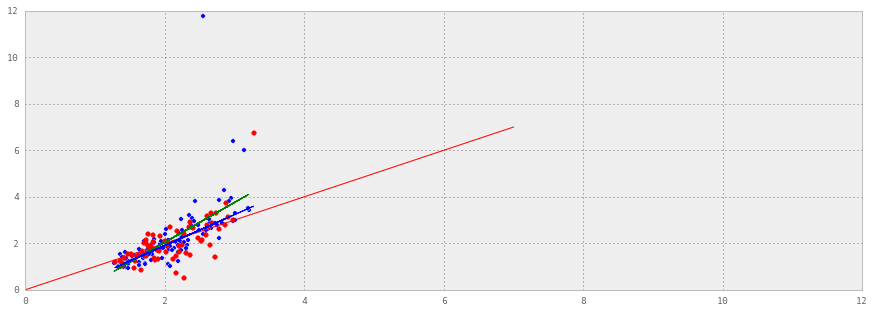

In [13]:
plt.scatter(est.predict(X_val),y_val)
plt.scatter(est.predict(X_test),y_test,color='r')



plt.plot(np.linspace(0, 7, 1000),np.linspace(0, 7, 1000))

x = est.predict(X_val)
y = y_val
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))

x = est.predict(X_test)
y = y_test
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))

plt.ylim([0,12])
plt.xlim([0,12])

In [15]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_actual,y_predict) #clfmodel2.predict(X_test))
#plt.pcolor(matrix.T.T)
#plt.colorbar()
matrix

array([[11,  9,  4],
       [ 0, 16,  6],
       [ 0,  5, 18]])

In [ ]:
sql_query = """
    SELECT  * FROM traffic_joined_with_features;
    """
data = add_features(get_data())

descriptors = []
descriptors = ['agency','city','state','zipcode']
test = pd.read_sql_query(sql_query,con).drop('index',axis=1)
test = test[test['surveyid'].isin(data.index.tolist())]
#test = test.merge(data,how='right',right_on='surveyid')
#data = add_features(get_data())[best_feature_names+['agency']]
#test
test = test.sort(columns='surveyid').set_index('surveyid',drop=True)
test = test[descriptors]
test
sorted_data = data.sort_index()
sorted_data = sorted_data[best_feature_names]
output = pd.concat([test,sorted_data],axis=1)
output

In [5]:
import pickle
#clf = pickle.load(open('randomforestclassifier.p','rb'))
best_feature_names = pickle.load(open('best_features_names_reg_diversity_80_20_Train_Test_TrimData_1kTrees_5MinLeaves_MaxFeaturesAll.p','rb'))

In [6]:
plot_data = process.add_features(process.get_data())#[best_feature_names+['rpsi']]
features = best_feature_names[:20]
plot_data = plot_data[features+['rpsi']]

In [7]:
featuremap = {}
featuremap['totacad'] = 'Required Officer Training'
featuremap['sgtmin'] = 'Minimum Sergeant Salary'
featuremap['diversity_index'] = 'Officer Diversity Index'
featuremap['entrymin'] = 'Minimum Officer Salary'

featuremap['white_officer_disparity'] = 'Officer Demographic Disparity'
featuremap['opbudget_per_capita'] = 'Police Budget Per Capita'

featuremap['sgtmax'] = 'Maximum Sergeant  Salary'
featuremap['entrymax'] = 'Maximum Officer Salary'
featuremap['rpsi'] = 'Search Rate Disparity'
#featuremap['urban_per_capita'] = ['Urban residents','per capita']
#featuremap['population_black_per_capita'] = ['Black population','per capita']
featuremap['chiefmin'] = 'Minimum Chief Officer Salary'
#featuremap['total_income_estimate_all_per_capita'] = ['Total Income','USD per capita']
featuremap['black_over_white_institutionalized_adult_disparity'] =  'Black/White in Jail'
featuremap['institutionalized_juvenile_white'] = 'Jailed white juveniles'
featuremap['numcarcam'] = 'Number of patrol car cameras'
#featuremap['total_income_estimate_white_per_capita'] = ['Total Income for whites','USD per capita']
#featuremap['nummrkcars_per_capita'] = ['Number of marked cars','per capita']
#featuremap['swnftemp_per_capita'] = ['Number of officers','per capita']
#featuremap['institutionalized_all_per_capita'] = ['Institutionalized residents','per capita']
#featuremap['black_over_white_population_disparity'] = ['Black/White population','']
plot_data.rename(columns=featuremap,inplace=True)

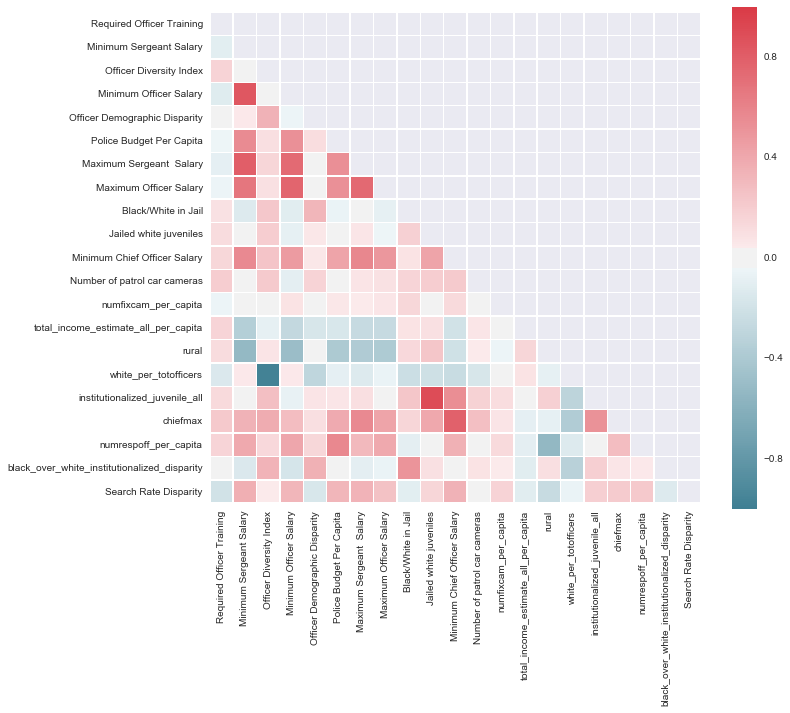

In [8]:
import seaborn as sns
corr = plot_data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,linewidths=.5,square=True,ax=ax) #, vmax=.3,square=True, xticklabels=5, yticklabels=5,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
